https://github.com/mamintoosi-papers-codes/ClusterGCN

In [1]:
import os, time
# from time import gmtime, strftime
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%X'))


18:02:18


In [2]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric
!pip install -q texttable
!pip install -q karateclub

     |████████████████████████████████| 23.9 MB 93 kB/s 


In [4]:
!git clone https://github.com/mamintoosi/Overlapping-Cluster-GCN.git

Cloning into 'ClusterGCN'...
remote: Enumerating objects: 707, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 707 (delta 171), reused 142 (delta 65), pack-reused 436
Receiving objects: 100% (707/707), 15.78 MiB | 16.00 MiB/s, done.
Resolving deltas: 100% (448/448), done.


In [5]:
%cd Overlapping-Cluster-GCN/

/ClusterGCN


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [7]:
%%time
Report = []
for ds_name in ['CiteSeer', 'Cora', 'PubMed', 'WikiCS']:
    for mc in [x / 10.0 for x in range(1, 11)]:
        %run src/main.py --dataset-name {ds_name} --clustering-overlap True\
        --clustering-method 'danmf' --epochs 10\
        --membership-closeness {mc}
        Report.append(ds_report)
        
df = pd.DataFrame(Report, columns=['Winner Membership Closeness','Dataset Name',\
'F-1 Score', 'Overlapped Nodes','Run Time'])
df

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Processing...
Done!


Train Loss: 0.4822: 100%|██████████| 10/10 [00:00<00:00, 12.25it/s]


Processing...
Done!


Train Loss: 0.5665: 100%|██████████| 10/10 [00:00<00:00, 11.70it/s]


Processing...
Done!


Train Loss: 0.813: 100%|██████████| 10/10 [00:00<00:00, 21.69it/s]


Processing...
Done!


Train Loss: 1.3501: 100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


CPU times: user 50min 24s, sys: 16min 58s, total: 1h 7min 22s
Wall time: 48min 24s


In [8]:
score_file_name = 'results/F1_score.xlsx'
writer = ExcelWriter(score_file_name)
df.to_excel(writer)#, sheet_name='All')  # , index=False)
writer.save()        
writer.close()

In [9]:
from google.colab import files
files.download(score_file_name) 
# files.download(score_png_file_name) 
# files.download(ON_ong_file_name) 
# files.download(RT_ong_file_name) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

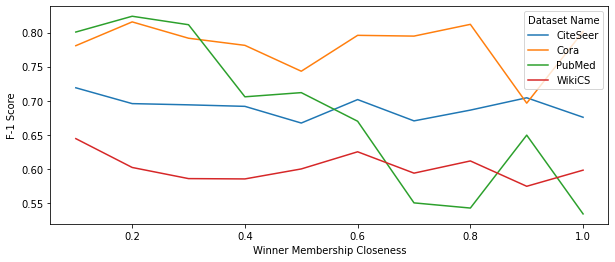

In [11]:
# df = pd.read_excel(file_name, engine="openpyxl") 
fig = plt.figure(figsize=(10, 4))
sns.lineplot(x="Winner Membership Closeness", y="F-1 Score",
             hue="Dataset Name",# style="min_freq",
             data=df)
# png_file_name = 'results/{}.png'.format(args.dataset_name)
score_png_file_name = 'results/F1_score.png'
fig.savefig(score_png_file_name)

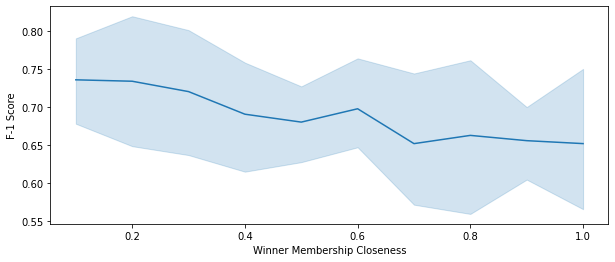

In [14]:
fig = plt.figure(figsize=(10, 4))
sns.lineplot(x="Winner Membership Closeness", y="F-1 Score",
            #  hue="Dataset Name",# style="min_freq",
             data=df)
# sns.lineplot(x="Winner Membership Closeness", y="F-1 Score",
#              hue="Dataset Name",# style="min_freq",
#              data=df)
score_png_file_name = 'results/F1_score.png'
fig.savefig(score_png_file_name)

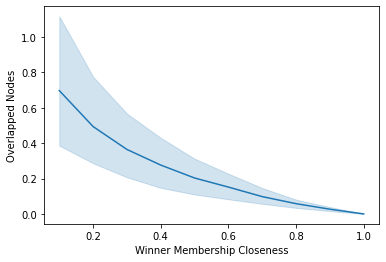

In [15]:
sns.lineplot(x="Winner Membership Closeness", y="Overlapped Nodes",
#              hue="dataset name",# style="min_freq",
             data=df)
ON_png_file_name = 'results/ON.png'
fig.savefig(ON_png_file_name)

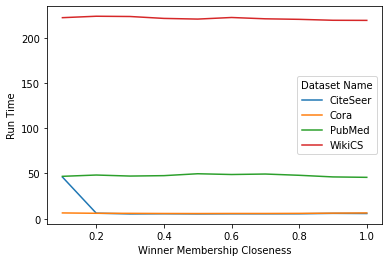

In [18]:
sns.lineplot(x="Winner Membership Closeness", y="Run Time",
             hue="Dataset Name",# style="min_freq",
             data=df)
RT_png_file_name = 'results/RT.png'
fig.savefig(RT_png_file_name)

In [17]:
import os, time
# from time import gmtime, strftime
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%X'))

18:53:24
